In [39]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

%precision %.4f

import warnings
warnings.filterwarnings('ignore')

# Chess Game EDA

Будем решать задачу классификации, используя датасет, содержащий более чем 20000 игр, собранных с сайта lichess.org

https://www.kaggle.com/datasets/datasnaek/chess

**Описание датасета:**

- Game ID;
- **Rated (T/F)** - целевой признак, предсказываем рейтинговая партия или нет
- Start Time;
- End Time;
- Number of Turns;
- Game Status;
- Winner;
- Time Increment;
- White Player ID;
- White Player Rating;
- Black Player ID;
- Black Player Rating;
- All Moves in Standard Chess Notation;
- Opening Eco (Standardised Code for any given opening, list here);
- Opening Name;
- Opening Ply (Number of moves in the opening phase)

In [40]:
df = pd.read_csv('games.csv')

In [41]:
df.head(3)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3


In [42]:
df.isnull().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

Пропущенные значения отсутствуют 

Переведем UNIX-время в реальное

In [43]:
df['created_at'] = pd.to_datetime(df['created_at'], unit='ms')
df['last_move_at'] = pd.to_datetime(df['last_move_at'], unit='ms')

In [44]:
df.head(3)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,2017-08-31 20:06:40,2017-08-31 20:06:40,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,2017-08-30 21:53:20,2017-08-30 21:53:20,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,2017-08-30 21:53:20,2017-08-30 21:53:20,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3


Удалим id игры и id игроков

In [45]:
df = df.drop(columns=['id', 'white_id', 'black_id'])

Уже по первым строкам видно, что некоторые значения столбцов 'created_at' и 'last_move_at' совпадают. Создадим и исследуем столбец, содержащий время игры

In [46]:
game_time = df['last_move_at'] - df['created_at']

In [47]:
game_time.describe()

count                        20058
mean     0 days 00:14:29.707049606
std      0 days 01:20:14.222090937
min                0 days 00:00:00
25%                0 days 00:00:00
50%      0 days 00:04:00.611999872
75%      0 days 00:13:13.171249984
max      7 days 00:17:24.700999936
dtype: object

In [48]:
game_time.quantile(q=0.4)

Timedelta('0 days 00:00:00')

 40% игр не содержат информации о времени игры, так что удалим данные столбцы

In [49]:
df = df.drop(columns=['last_move_at', 'created_at'])

In [50]:
df.head(3)

,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply
0,False,13,outoftime,white,15+2,1500,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,True,16,resign,black,5+10,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,True,61,mate,white,5+10,1496,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3


Есть ли в данных одинаковые строки?

In [51]:
df.duplicated().sum()

946

In [52]:
df = df.drop_duplicates()

In [53]:
df.shape[0]

19112

После удаления дубликатов осталось 19112 уникальных значений

Преобразуем столбец 'increment_code' к более читаемому виду

In [54]:
q = df['increment_code']
new_col = []
for i in q:
    s = i.split('+')
    t = int(s[0])
    if t < 3:
        new_col.append('bullet')
    elif t < 8:
        new_col.append('blitz')
    elif t < 25:
        new_col.append('rapid')
    else:
        new_col.append('classical')

df['increment_code'] = new_col

In [55]:
df.head()

,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply
0,False,13,outoftime,white,rapid,1500,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,True,16,resign,black,blitz,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,True,61,mate,white,blitz,1496,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,True,61,mate,white,rapid,1439,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,True,95,mate,white,classical,1523,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


Удалим столбцы 'moves', 'opening_eco' и 'opening_name', потому что их исследование заслуживает отдельной задачи методами NLP

In [56]:
df = df.drop(columns=['moves', 'opening_eco', 'opening_name'])

Также удалим слишком короткие партии(менее 2 ходов), поскольку они не содержат полезной информации

In [57]:
df = df.loc[df['turns'] > 2]
df.shape[0]

18919

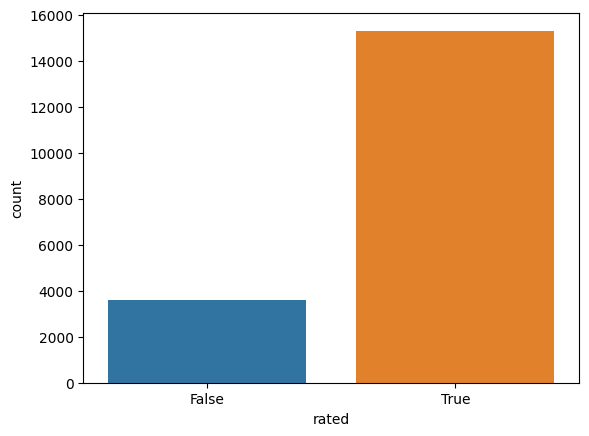

In [58]:
sns.countplot(x = 'rated', data = df);

Большинство игр(около 15к) - рейтинговые, и менее 4к - товарищеские

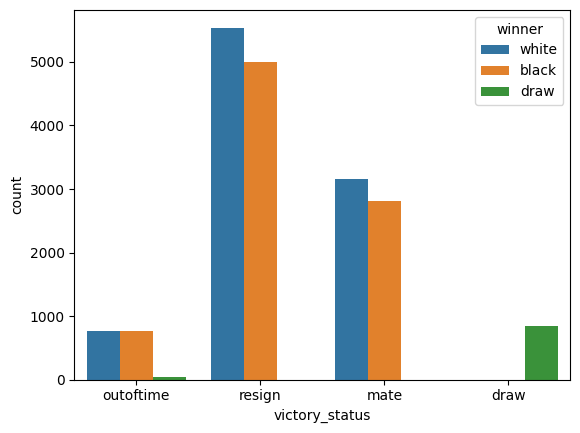

In [59]:
sns.countplot(x = 'victory_status', data = df, hue = 'winner');

Большинство игр завершалось добровольной сдачей, также около 6к матом, оставшаяся часть - по времени, либо ничьей

In [60]:
df.head()

,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_ply
0,False,13,outoftime,white,rapid,1500,1191,5
1,True,16,resign,black,blitz,1322,1261,4
2,True,61,mate,white,blitz,1496,1500,3
3,True,61,mate,white,rapid,1439,1454,3
4,True,95,mate,white,classical,1523,1469,5


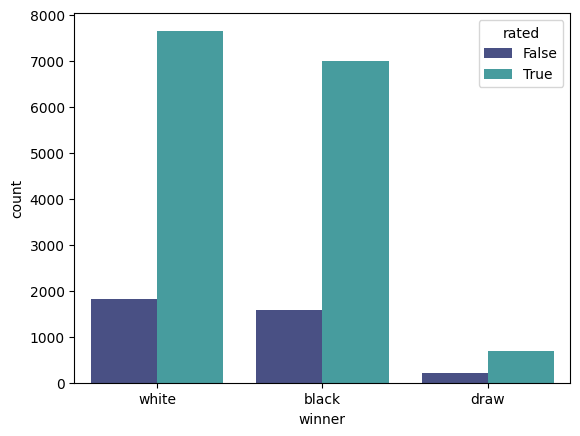

In [61]:
sns.countplot(x = 'winner', data = df, hue = 'rated', palette = 'mako');

Белые и черные побеждают практически одинаково, ничья встречается редко

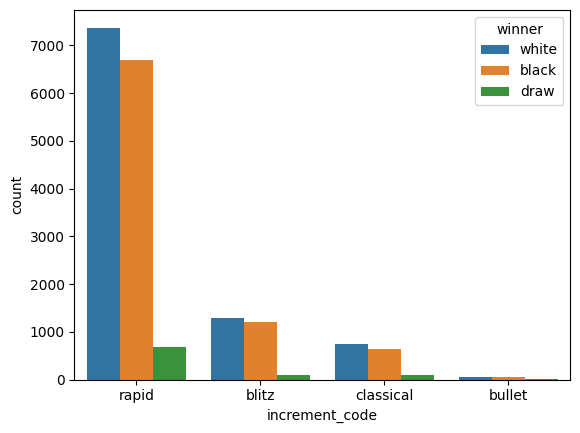

In [62]:
sns.countplot(x = 'increment_code', hue = 'winner', data = df);

Большинство сыгранных партий - рапид

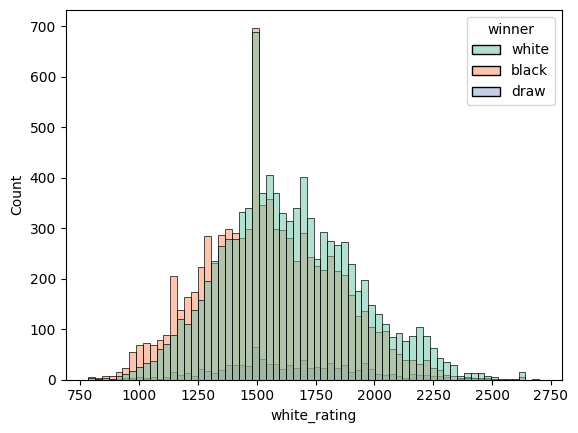

In [63]:
sns.histplot(x = 'white_rating', hue = 'winner', data = df, palette = 'Set2');

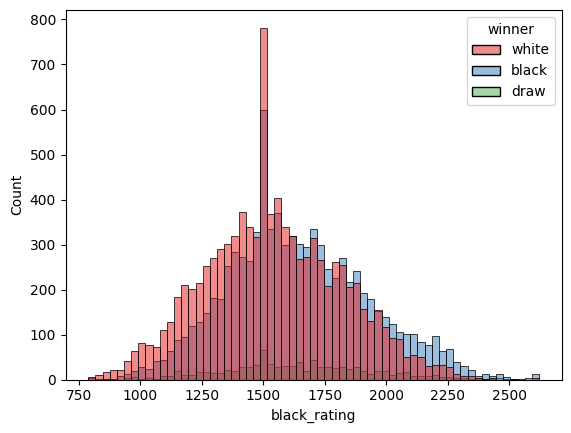

In [64]:
sns.histplot(x = 'black_rating', hue = 'winner', data = df, palette = 'Set1');

Рейтинги белых и черных нормально распределены. Самый популярный рейтинг - 1500, что вполне логично, т.к. это средний уровень

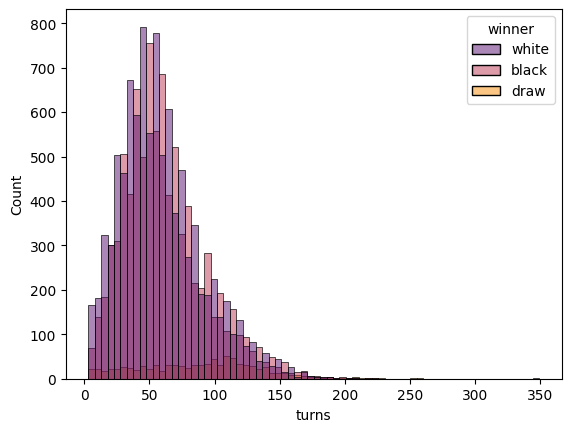

In [65]:
sns.histplot(x = 'turns', hue = 'winner', data = df, palette = 'inferno', bins = 70);

Распределение числа ходов также близко к нормальному. При малом количестве ходов побеждают, как правило, белые, а при увеличении этого показателя и те и другие. Возможно, это связано с тем, что белые открывают игру и имеют небольшое преимущество в развитии на начальном этапе

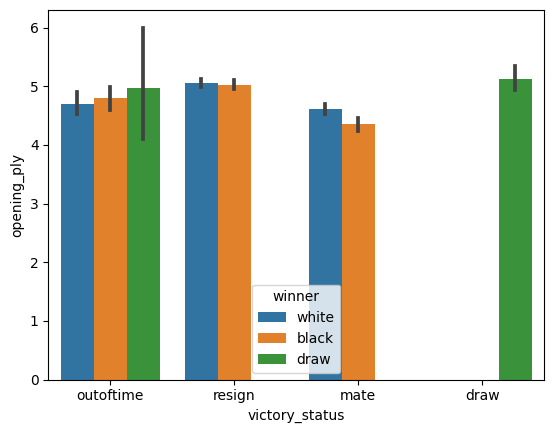

In [66]:
sns.barplot(x = 'victory_status', y = 'opening_ply', hue = 'winner', data = df);

Количество ходов в дебюте, в целом, не превосходит 5 независимо от результата партии и победителя. Любопытно, что в ничейных партиях количество дебютных ходов больше, чем в партиях с победителем.

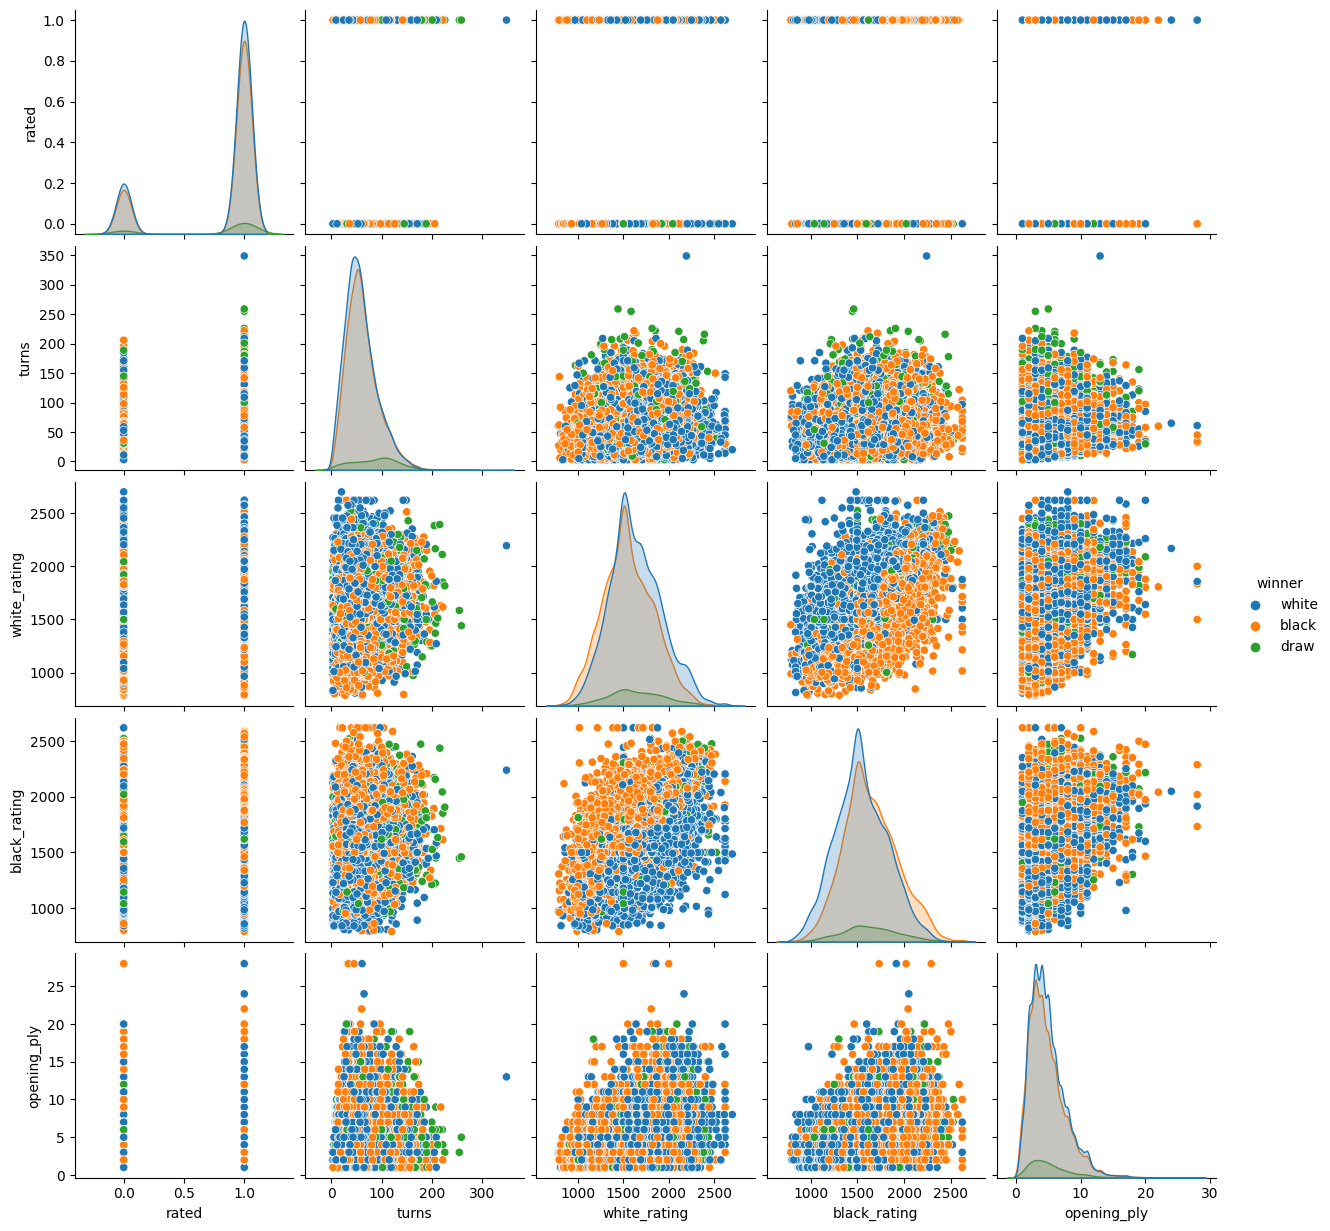

In [67]:
sns.pairplot(data = df, hue = 'winner');

- Чем выше рейтинг, тем больше общее количество ходов в партии
- Чем больше ходов сделано в дебюте, тем меньше общее количество ходов в партии
- В рейтинговых партиях количество ходов больше, чем в товарищеских

Закодируем категориальные нецелевые признаки и целовой признак

In [68]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

enc = OneHotEncoder()
le = LabelEncoder()

enc_df = pd.DataFrame(enc.fit_transform(df[['winner', 'victory_status', 'increment_code']]).toarray())
enc_df.columns = enc.get_feature_names_out(['winner', 'victory_status', 'increment_code'])

df.drop(['winner', 'victory_status', 'increment_code'], axis=1, inplace=True) 


df = df.reset_index(drop=True)

df = df.join(enc_df)

df

,rated,turns,white_rating,black_rating,opening_ply,winner_black,winner_draw,winner_white,victory_status_draw,victory_status_mate,victory_status_outoftime,victory_status_resign,increment_code_blitz,increment_code_bullet,increment_code_classical,increment_code_rapid
0,False,13,1500,1191,5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,True,16,1322,1261,4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,True,61,1496,1500,3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,True,61,1439,1454,3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,True,95,1523,1469,5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18914,True,24,1691,1220,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
18915,True,82,1233,1196,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
18916,True,35,1219,1286,3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
18917,True,109,1360,1227,4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# Bagging

In [69]:
from sklearn.tree import DecisionTreeClassifier

class Bagging:
    
    def __init__(self, n_estimators=30, model_ = DecisionTreeClassifier()):
        self.n_estimators = n_estimators
        self.models = []
        self.model_ = model_
        
    def bootstrup(self, data):
        data_boot = {}
        indices = [i for i in range(data.shape[0])]
        for i in range(self.n_estimators):
            index_mix = np.random.choice(indices, replace=True, size=data.shape[0])
            new_data = data[index_mix, :]
            data_boot[i] = new_data
        return data_boot
    
    def fit(self, X_train, y_train):
        train_data = np.concatenate((X_train, y_train.values.reshape(-1,1)), axis=1)
        boot = self.bootstrup(train_data)
        for i in range(self.n_estimators):
            model = self.model_
            model.fit(boot[i][:, :-1], boot[i][:, -1])
            self.models.append(model)
            
    def predict(self, X):
        predictions = []
        for m in self.models:
            predictions.append(m.predict(X).reshape(-1,1))
        pred = np.round(np.mean(np.concatenate(predictions,axis=1),axis=1)).astype(int)
        return pred

# AdaBoost

In [90]:
class AdaBoost:
    
    def __init__(self, n_estimators=30, model_ = DecisionTreeClassifier(max_depth=1)):
        self.n_estimators = n_estimators
        self.models = []
        self.model_ = model_
        
    def I(self, el):
        return 1 if el else 0
        
    def fit(self, X_train, y_train):
        X_train = X_train.reset_index(drop=True)
        y_train = y_train.reset_index(drop=True)
        w = np.array([1/len(y_train) for i in range(len(y_train))])
        for i in range(self.n_estimators):
            model = self.model_
            model.fit(X_train, y_train, sample_weight=w)
            prediction = model.predict(X_train)
            ans = np.array([self.I(prediction[i] != y_train[i]) for i in range(len(y_train))])
            err = np.dot(w,ans)/sum(w)
            alpha = np.log((1-err)/err)
            w = np.array([w[i]*np.exp(alpha*self.I(y_train[i] != prediction[i])) for i in range(len(y_train))])
            self.models.append((alpha, model))
            
    def predict(self, X):
        y = np.zeros(X.shape[0])
        for i in range(self.n_estimators):
            y += self.models[i][0]*self.models[i][1].predict(X)
        y = np.sign(y)
        return y

## Теперь обучим модели

In [71]:
y = df['rated']
X = df.drop(['rated'], axis=1)
X

,turns,white_rating,black_rating,opening_ply,winner_black,winner_draw,winner_white,victory_status_draw,victory_status_mate,victory_status_outoftime,victory_status_resign,increment_code_blitz,increment_code_bullet,increment_code_classical,increment_code_rapid
0,13,1500,1191,5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,16,1322,1261,4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,61,1496,1500,3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,61,1439,1454,3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,95,1523,1469,5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18914,24,1691,1220,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
18915,82,1233,1196,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
18916,35,1219,1286,3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
18917,109,1360,1227,4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [72]:
y.mean()

0.8095

In [73]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score
from time import process_time
from sklearn.ensemble import HistGradientBoostingClassifier, GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier,  BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import optuna


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [102]:
trials_num = 50
models = [Bagging(), AdaBoost(), BaggingClassifier(), AdaBoostClassifier(), RandomForestClassifier(), 
          GradientBoostingClassifier(), HistGradientBoostingClassifier(), XGBClassifier(), 
          LGBMClassifier(), CatBoostClassifier()]
models_name = ["Bagging","AdaBoost","BaggingClassifier","AdaBoostClassifier","RandomForestClassifier","GradientBoostingClassifier", "HistGradientBoostingClassifier", "XGBClassifier", "LGBMClassifier","CatBoostClassifier" ]
params = [{"n_estimators":(20,100)},
          {"n_estimators":(20,100)},
          {"n_estimators":(20,100), "max_samples": (0.1, 1.0), "max_features": (0.1, 1.0)},
          {"n_estimators":(20,100)},
          {"n_estimators":(20,100), "max_depth":(1,10), "max_samples":(0.10,1.00), "max_features":(0.10,1.00)},
          {"n_estimators":(20,100), "max_depth":(1,10), "max_features":(0.10,1.00)},
          {"max_depth":(1,10), "max_iter":(50, 150)},
          {"n_estimators": (20, 100), "max_depth":(1,10)},
          {"n_estimators":(20, 100), "max_depth":(1,10)},
          {"n_estimators": (20, 100), "max_depth":(1,10)}
         ]
results = {"Models": models_name, 
           "Accuracy": [],
           "Recall": [],
           "Precision": [],
           "ROC_AUC": [],
           "Time": [], 
           "Best Params":[]
          }

for i in range(len(models)):
    def objective(trial):
        res_param = {}
        keys = list(params[i].keys())
        for key in keys:
            tmp = None
            if (key == "max_samples" or key == "max_features"):
                tmp = trial.suggest_float(key,params[i][key][0], params[i][key][1])
            else: 
                tmp = trial.suggest_int(key,params[i][key][0], params[i][key][1])
            res_param[key] = tmp
        
        if (models_name[i] == "CatBoostClassifier"):
            res_param["verbose"] = False
        learner = type(models[i])(**res_param)
        learner.fit(X_train, y_train)
        pred = learner.predict(X_test)
        if (models_name[i] == "CatBoostClassifier"):
            prediction = []
            for j in pred:
                if j == 'False':
                    prediction.append(False)
                if j == 'True':
                    prediction.append(True)
            pred = prediction
        acc = accuracy_score(y_test, pred)
        return acc
    optuna_study = optuna.create_study(direction="maximize")
    optuna_study.optimize(objective, n_trials=trials_num)
    results["Accuracy"].append(optuna_study.best_value)
    results["Best Params"].append(optuna_study.best_params)

[I 2023-03-26 20:02:40,110] A new study created in memory with name: no-name-a51ba028-bcb8-4b95-b059-cc0def0723d8
[I 2023-03-26 20:02:43,417] Trial 0 finished with value: 0.7651515151515151 and parameters: {'n_estimators': 62}. Best is trial 0 with value: 0.7651515151515151.
[I 2023-03-26 20:02:44,695] Trial 1 finished with value: 0.7536997885835095 and parameters: {'n_estimators': 24}. Best is trial 0 with value: 0.7651515151515151.
[I 2023-03-26 20:02:49,613] Trial 2 finished with value: 0.7563424947145877 and parameters: {'n_estimators': 93}. Best is trial 0 with value: 0.7651515151515151.
[I 2023-03-26 20:02:50,733] Trial 3 finished with value: 0.7526427061310782 and parameters: {'n_estimators': 21}. Best is trial 0 with value: 0.7651515151515151.
[I 2023-03-26 20:02:54,804] Trial 4 finished with value: 0.7455954897815363 and parameters: {'n_estimators': 77}. Best is trial 0 with value: 0.7651515151515151.
[I 2023-03-26 20:02:56,178] Trial 5 finished with value: 0.7551092318534179 

[I 2023-03-26 20:05:19,095] Trial 46 finished with value: 0.757399577167019 and parameters: {'n_estimators': 64}. Best is trial 0 with value: 0.7651515151515151.
[I 2023-03-26 20:05:22,361] Trial 47 finished with value: 0.7535236081747709 and parameters: {'n_estimators': 62}. Best is trial 0 with value: 0.7651515151515151.
[I 2023-03-26 20:05:25,852] Trial 48 finished with value: 0.7515856236786469 and parameters: {'n_estimators': 66}. Best is trial 0 with value: 0.7651515151515151.
[I 2023-03-26 20:05:28,889] Trial 49 finished with value: 0.7517618040873855 and parameters: {'n_estimators': 57}. Best is trial 0 with value: 0.7651515151515151.
[I 2023-03-26 20:05:28,890] A new study created in memory with name: no-name-b433094f-bec4-47e0-8ddd-6486a2304597
[I 2023-03-26 20:05:35,099] Trial 0 finished with value: 0.19362226920366454 and parameters: {'n_estimators': 60}. Best is trial 0 with value: 0.19362226920366454.
[I 2023-03-26 20:05:41,857] Trial 1 finished with value: 0.582628611698

[I 2023-03-26 20:09:52,549] Trial 42 finished with value: 0.8081395348837209 and parameters: {'n_estimators': 45}. Best is trial 9 with value: 0.8081395348837209.
[I 2023-03-26 20:09:57,020] Trial 43 finished with value: 0.19362226920366454 and parameters: {'n_estimators': 37}. Best is trial 9 with value: 0.8081395348837209.
[I 2023-03-26 20:10:03,281] Trial 44 finished with value: 0.19362226920366454 and parameters: {'n_estimators': 52}. Best is trial 9 with value: 0.8081395348837209.
[I 2023-03-26 20:10:08,484] Trial 45 finished with value: 0.5923185341789993 and parameters: {'n_estimators': 43}. Best is trial 9 with value: 0.8081395348837209.
[I 2023-03-26 20:10:14,206] Trial 46 finished with value: 0.8081395348837209 and parameters: {'n_estimators': 47}. Best is trial 9 with value: 0.8081395348837209.
[I 2023-03-26 20:10:18,226] Trial 47 finished with value: 0.19362226920366454 and parameters: {'n_estimators': 33}. Best is trial 9 with value: 0.8081395348837209.
[I 2023-03-26 20:10

[I 2023-03-26 20:11:03,220] Trial 27 finished with value: 0.8387949260042283 and parameters: {'n_estimators': 64, 'max_samples': 0.7684933771651226, 'max_features': 0.8145071588953612}. Best is trial 12 with value: 0.8439041578576463.
[I 2023-03-26 20:11:05,987] Trial 28 finished with value: 0.8410852713178295 and parameters: {'n_estimators': 90, 'max_samples': 0.9258687604163703, 'max_features': 0.9114111935936122}. Best is trial 12 with value: 0.8439041578576463.
[I 2023-03-26 20:11:07,054] Trial 29 finished with value: 0.8405567300916138 and parameters: {'n_estimators': 39, 'max_samples': 0.8616082987786998, 'max_features': 0.822851263755301}. Best is trial 12 with value: 0.8439041578576463.
[I 2023-03-26 20:11:08,601] Trial 30 finished with value: 0.8365045806906272 and parameters: {'n_estimators': 62, 'max_samples': 0.9978082742485201, 'max_features': 0.7084096185403912}. Best is trial 12 with value: 0.8439041578576463.
[I 2023-03-26 20:11:10,884] Trial 31 finished with value: 0.8

[I 2023-03-26 20:11:56,901] Trial 14 finished with value: 0.8299859055673009 and parameters: {'n_estimators': 97}. Best is trial 12 with value: 0.8301620859760395.
[I 2023-03-26 20:11:57,363] Trial 15 finished with value: 0.8289288231148696 and parameters: {'n_estimators': 67}. Best is trial 12 with value: 0.8301620859760395.
[I 2023-03-26 20:11:57,995] Trial 16 finished with value: 0.8298097251585623 and parameters: {'n_estimators': 92}. Best is trial 12 with value: 0.8301620859760395.
[I 2023-03-26 20:11:58,566] Trial 17 finished with value: 0.8291050035236082 and parameters: {'n_estimators': 83}. Best is trial 12 with value: 0.8301620859760395.
[I 2023-03-26 20:11:58,977] Trial 18 finished with value: 0.8291050035236082 and parameters: {'n_estimators': 59}. Best is trial 12 with value: 0.8301620859760395.
[I 2023-03-26 20:11:59,665] Trial 19 finished with value: 0.8301620859760395 and parameters: {'n_estimators': 100}. Best is trial 12 with value: 0.8301620859760395.
[I 2023-03-26 2

[I 2023-03-26 20:12:20,594] Trial 7 finished with value: 0.8356236786469344 and parameters: {'n_estimators': 82, 'max_depth': 7, 'max_samples': 0.307031019529366, 'max_features': 0.9925089184341086}. Best is trial 4 with value: 0.8370331219168429.
[I 2023-03-26 20:12:20,736] Trial 8 finished with value: 0.8076109936575053 and parameters: {'n_estimators': 56, 'max_depth': 6, 'max_samples': 0.20912409626736644, 'max_features': 0.1587810882001563}. Best is trial 4 with value: 0.8370331219168429.
[I 2023-03-26 20:12:20,927] Trial 9 finished with value: 0.8090204369274137 and parameters: {'n_estimators': 51, 'max_depth': 4, 'max_samples': 0.5212666132659763, 'max_features': 0.3356029249852294}. Best is trial 4 with value: 0.8370331219168429.
[I 2023-03-26 20:12:21,216] Trial 10 finished with value: 0.8076109936575053 and parameters: {'n_estimators': 82, 'max_depth': 1, 'max_samples': 0.7284885732458979, 'max_features': 0.9906336946780545}. Best is trial 4 with value: 0.8370331219168429.
[I 

[I 2023-03-26 20:12:44,852] Trial 39 finished with value: 0.8329809725158562 and parameters: {'n_estimators': 82, 'max_depth': 7, 'max_samples': 0.44335258141949463, 'max_features': 0.7746048682700801}. Best is trial 25 with value: 0.8403805496828752.
[I 2023-03-26 20:12:45,586] Trial 40 finished with value: 0.8349189570119803 and parameters: {'n_estimators': 77, 'max_depth': 9, 'max_samples': 0.6122156929962789, 'max_features': 0.5739348941916249}. Best is trial 25 with value: 0.8403805496828752.
[I 2023-03-26 20:12:46,657] Trial 41 finished with value: 0.8396758280479211 and parameters: {'n_estimators': 87, 'max_depth': 10, 'max_samples': 0.48419863875074204, 'max_features': 0.8402544414704877}. Best is trial 25 with value: 0.8403805496828752.
[I 2023-03-26 20:12:47,912] Trial 42 finished with value: 0.8393234672304439 and parameters: {'n_estimators': 92, 'max_depth': 10, 'max_samples': 0.5645821578268739, 'max_features': 0.8481464550532395}. Best is trial 25 with value: 0.8403805496

[I 2023-03-26 20:13:22,132] Trial 23 finished with value: 0.8407329105003524 and parameters: {'n_estimators': 100, 'max_depth': 7, 'max_features': 0.5936960071532479}. Best is trial 20 with value: 0.842847075405215.
[I 2023-03-26 20:13:23,965] Trial 24 finished with value: 0.8402043692741367 and parameters: {'n_estimators': 74, 'max_depth': 8, 'max_features': 0.8568932085776012}. Best is trial 20 with value: 0.842847075405215.
[I 2023-03-26 20:13:26,845] Trial 25 finished with value: 0.8400281888653982 and parameters: {'n_estimators': 88, 'max_depth': 9, 'max_features': 0.9493065677623395}. Best is trial 20 with value: 0.842847075405215.
[I 2023-03-26 20:13:27,807] Trial 26 finished with value: 0.8393234672304439 and parameters: {'n_estimators': 70, 'max_depth': 5, 'max_features': 0.7382497251821143}. Best is trial 20 with value: 0.842847075405215.
[I 2023-03-26 20:13:28,326] Trial 27 finished with value: 0.8328047921071177 and parameters: {'n_estimators': 44, 'max_depth': 4, 'max_feat

[I 2023-03-26 20:14:07,075] Trial 11 finished with value: 0.8308668076109936 and parameters: {'max_depth': 5, 'max_iter': 50}. Best is trial 4 with value: 0.8384425651867512.
[I 2023-03-26 20:14:07,250] Trial 12 finished with value: 0.8363284002818887 and parameters: {'max_depth': 5, 'max_iter': 94}. Best is trial 4 with value: 0.8384425651867512.
[I 2023-03-26 20:14:07,446] Trial 13 finished with value: 0.8350951374207188 and parameters: {'max_depth': 7, 'max_iter': 77}. Best is trial 4 with value: 0.8384425651867512.
[I 2023-03-26 20:14:07,639] Trial 14 finished with value: 0.8368569415081043 and parameters: {'max_depth': 5, 'max_iter': 107}. Best is trial 4 with value: 0.8384425651867512.
[I 2023-03-26 20:14:07,790] Trial 15 finished with value: 0.8354474982381959 and parameters: {'max_depth': 10, 'max_iter': 148}. Best is trial 4 with value: 0.8384425651867512.
[I 2023-03-26 20:14:07,863] Trial 16 finished with value: 0.8081395348837209 and parameters: {'max_depth': 1, 'max_iter': 

[I 2023-03-26 20:14:14,322] Trial 4 finished with value: 0.8386187455954898 and parameters: {'n_estimators': 41, 'max_depth': 7}. Best is trial 1 with value: 0.8402043692741367.
[I 2023-03-26 20:14:14,458] Trial 5 finished with value: 0.8366807610993657 and parameters: {'n_estimators': 29, 'max_depth': 10}. Best is trial 1 with value: 0.8402043692741367.
[I 2023-03-26 20:14:14,694] Trial 6 finished with value: 0.8375616631430585 and parameters: {'n_estimators': 86, 'max_depth': 7}. Best is trial 1 with value: 0.8402043692741367.
[I 2023-03-26 20:14:14,790] Trial 7 finished with value: 0.8372093023255814 and parameters: {'n_estimators': 54, 'max_depth': 2}. Best is trial 1 with value: 0.8402043692741367.
[I 2023-03-26 20:14:14,924] Trial 8 finished with value: 0.8405567300916138 and parameters: {'n_estimators': 86, 'max_depth': 4}. Best is trial 8 with value: 0.8405567300916138.
[I 2023-03-26 20:14:15,046] Trial 9 finished with value: 0.8391472868217055 and parameters: {'n_estimators': 

[I 2023-03-26 20:14:21,084] Trial 47 finished with value: 0.8398520084566596 and parameters: {'n_estimators': 44, 'max_depth': 6}. Best is trial 38 with value: 0.8426708949964764.
[I 2023-03-26 20:14:21,188] Trial 48 finished with value: 0.8393234672304439 and parameters: {'n_estimators': 48, 'max_depth': 5}. Best is trial 38 with value: 0.8426708949964764.
[I 2023-03-26 20:14:21,403] Trial 49 finished with value: 0.837737843551797 and parameters: {'n_estimators': 65, 'max_depth': 8}. Best is trial 38 with value: 0.8426708949964764.
[I 2023-03-26 20:14:21,405] A new study created in memory with name: no-name-2e212f4a-043e-4f04-ad80-26742085c686
[I 2023-03-26 20:14:21,459] Trial 0 finished with value: 0.8379140239605356 and parameters: {'n_estimators': 92, 'max_depth': 4}. Best is trial 0 with value: 0.8379140239605356.
[I 2023-03-26 20:14:21,493] Trial 1 finished with value: 0.8340380549682875 and parameters: {'n_estimators': 20, 'max_depth': 8}. Best is trial 0 with value: 0.837914023

[I 2023-03-26 20:14:23,656] Trial 39 finished with value: 0.8380902043692742 and parameters: {'n_estimators': 88, 'max_depth': 4}. Best is trial 18 with value: 0.8410852713178295.
[I 2023-03-26 20:14:23,710] Trial 40 finished with value: 0.8386187455954898 and parameters: {'n_estimators': 100, 'max_depth': 4}. Best is trial 18 with value: 0.8410852713178295.
[I 2023-03-26 20:14:23,772] Trial 41 finished with value: 0.8407329105003524 and parameters: {'n_estimators': 92, 'max_depth': 5}. Best is trial 18 with value: 0.8410852713178295.
[I 2023-03-26 20:14:23,835] Trial 42 finished with value: 0.8407329105003524 and parameters: {'n_estimators': 93, 'max_depth': 5}. Best is trial 18 with value: 0.8410852713178295.
[I 2023-03-26 20:14:23,902] Trial 43 finished with value: 0.8384425651867512 and parameters: {'n_estimators': 87, 'max_depth': 6}. Best is trial 18 with value: 0.8410852713178295.
[I 2023-03-26 20:14:23,964] Trial 44 finished with value: 0.8407329105003524 and parameters: {'n_es

[I 2023-03-26 20:14:29,623] Trial 31 finished with value: 0.8379140239605356 and parameters: {'n_estimators': 48, 'max_depth': 6}. Best is trial 15 with value: 0.8398520084566596.
[I 2023-03-26 20:14:29,739] Trial 32 finished with value: 0.8386187455954898 and parameters: {'n_estimators': 37, 'max_depth': 6}. Best is trial 15 with value: 0.8398520084566596.
[I 2023-03-26 20:14:29,867] Trial 33 finished with value: 0.8373854827343199 and parameters: {'n_estimators': 52, 'max_depth': 5}. Best is trial 15 with value: 0.8398520084566596.
[I 2023-03-26 20:14:29,973] Trial 34 finished with value: 0.8356236786469344 and parameters: {'n_estimators': 30, 'max_depth': 6}. Best is trial 15 with value: 0.8398520084566596.
[I 2023-03-26 20:14:30,184] Trial 35 finished with value: 0.8366807610993657 and parameters: {'n_estimators': 45, 'max_depth': 8}. Best is trial 15 with value: 0.8398520084566596.
[I 2023-03-26 20:14:30,782] Trial 36 finished with value: 0.8299859055673009 and parameters: {'n_est

In [128]:
models = [Bagging, AdaBoost, BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, 
          GradientBoostingClassifier, HistGradientBoostingClassifier, XGBClassifier, 
          LGBMClassifier, CatBoostClassifier]
for i in range(len(models)):
    model = models[i](**results["Best Params"][i])
    start_time = process_time()
    model.fit(X_train, y_train)
    stop_time = process_time()
    prediction = model.predict(X_test)
    if (models_name[i] == "CatBoostClassifier"):
        pred = []
        for j in prediction:
            if j == 'False':
                pred.append(False)
            if j == 'True':
                pred.append(True)
        prediction = pred
    results["Recall"].append(recall_score(y_test, prediction))
    results["Precision"].append(precision_score(y_test, prediction))
    results["ROC_AUC"].append(roc_auc_score(y_test, prediction))
    results["Time"].append(stop_time-start_time)

Learning rate set to 0.5
0:	learn: 0.5368074	total: 1.41ms	remaining: 63.5ms
1:	learn: 0.4811775	total: 2.95ms	remaining: 64.9ms
2:	learn: 0.4601038	total: 4.25ms	remaining: 60.8ms
3:	learn: 0.4359893	total: 5.61ms	remaining: 58.9ms
4:	learn: 0.4232830	total: 7.15ms	remaining: 58.7ms
5:	learn: 0.4189418	total: 8.61ms	remaining: 57.4ms
6:	learn: 0.4165904	total: 10ms	remaining: 55.9ms
7:	learn: 0.4147592	total: 11.4ms	remaining: 54.1ms
8:	learn: 0.4106833	total: 12.9ms	remaining: 53ms
9:	learn: 0.4066579	total: 14.3ms	remaining: 51.4ms
10:	learn: 0.4047140	total: 15.8ms	remaining: 50.1ms
11:	learn: 0.4034040	total: 17.2ms	remaining: 48.7ms
12:	learn: 0.4029500	total: 18.5ms	remaining: 47ms
13:	learn: 0.4013206	total: 19.9ms	remaining: 45.5ms
14:	learn: 0.4002785	total: 21.3ms	remaining: 44.1ms
15:	learn: 0.3985728	total: 22.9ms	remaining: 42.9ms
16:	learn: 0.3975026	total: 24.3ms	remaining: 41.5ms
17:	learn: 0.3951190	total: 25.7ms	remaining: 40ms
18:	learn: 0.3944616	total: 27.3ms	rema

# Результаты

In [129]:
pd.DataFrame(data = results).sort_values(by="Accuracy", ascending=False).drop("Best Params", axis=1)

,Models,Accuracy,Recall,Precision,ROC_AUC,Time
2,BaggingClassifier,0.844785,0.970942,0.852321,0.635152,2.214680
5,GradientBoostingClassifier,0.843199,0.963513,0.857143,0.647362,1.732068
7,XGBClassifier,0.842671,0.962639,0.859204,0.652839,0.959111
8,LGBMClassifier,0.841085,0.969194,0.853569,0.638373,0.303214
4,RandomForestClassifier,0.840381,0.970505,0.851610,0.633114,0.873027
6,HistGradientBoostingClassifier,0.840028,0.964169,0.848817,0.624487,0.698312
9,CatBoostClassifier,0.839852,0.969194,0.852421,0.635188,0.369895
3,AdaBoostClassifier,0.830162,0.975311,0.839887,0.600486,0.635272
1,AdaBoost,0.808140,0.998908,0.808345,0.506278,33.472217
0,Bagging,0.765152,0.854271,0.851110,0.615944,5.292606


Видно, что Accuracy у встроенных моделей имеет примерно одинаковое значение, немного отстает реализованный алгоритм AdaBoost, а самый низкий результат у реализованного Bagging, хотя разница не превышает 0.1 с другими алгоритмами, что говорит о хорошем результате. Значения Recall, Precision и ROC_AUC также достаточно близки у всех алгоритмов. Быстрее всех обучился классификатор CatBoost, а самым медленным оказался реализованный AdaBoost.

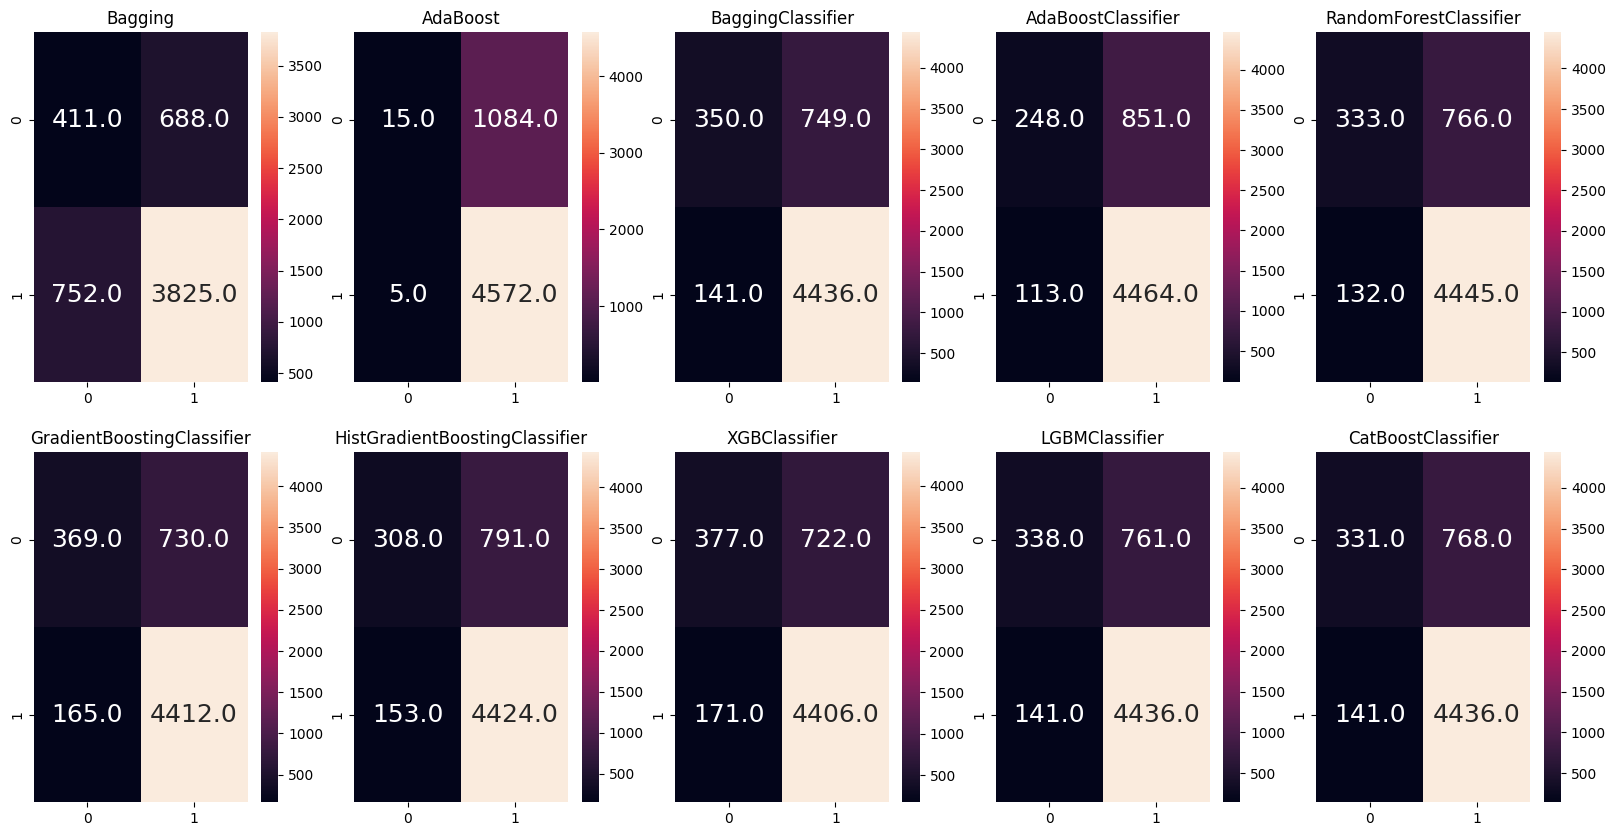

In [135]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(20, 10))

for i in range(len(models)):
    if models_name[i] == "CatBoostClassifier":
        results["Best Params"][i]["verbose"] = False
    mod = models[i](**results["Best Params"][i])
    mod.fit(X_train, y_train)
    prediction = mod.predict(X_test)
    if (models_name[i] == "CatBoostClassifier"):
        pred = []
        for j in prediction:
            if j == 'False':
                pred.append(False)
            if j == 'True':
                pred.append(True)
        prediction = pred
    plt.subplot(2, 5, i+1)
    plt.title(models_name[i])
    sns.heatmap(confusion_matrix(y_test, prediction), annot=True, cbar=True, fmt='.1f', annot_kws={"size": 18})

plt.show()